In [1]:
from utils import find_matching_experiments, parse_sim_results, parse_vllm_results, calculate_errors, plot_results
import os

vllm_dir = "profiling/minisweep"
sim_dir = "profiling/minisweep_sim"

sweep_configs = {
    'num_prompts': [400],
    'request_rate': [32],
    'temperature': [0.0],
    'max_num_batched_tokens': [256, 512, 1024, 2048, 4096, 8192],
    'long_prefill_token_threshold': [16, 32, 64, 128, 256, 512, 1024],
    'datasets': [{'name': 'sharegpt', 'path': 'ShareGPT_V3_unfiltered_cleaned_split.json'}]
}


# graphing parameters
x_axis = 'long_prefill_token_threshold'
y_axis = 'max_num_batched_tokens'
metrics = ['ttft_accuracy', 'tpot_accuracy', 'e2e_accuracy', 'duration_accuracy']
plotting_data = {}
for metric in metrics:
    plotting_data[metric] = {}

# Find matching experiments
matching_pairs = find_matching_experiments(sim_dir, vllm_dir, sweep_configs)

print(f"Found {len(matching_pairs)} matching experiment pairs")

# Process each pair
for sim_file, vllm_file, config in matching_pairs:
    print(f"\nProcessing: {os.path.basename(sim_file)}")
    
    # Parse results
    sim_results = parse_sim_results(sim_file)
    vllm_results = parse_vllm_results(vllm_file)
    
    
    # Calculate errors
    errors = calculate_errors(sim_results, vllm_results)
    # Print results
    for metric, value in errors.items():
        if metric in metrics:
            if plotting_data[metric].get(str(config[y_axis])) is None:
                plotting_data[metric][str(config[y_axis])] = []
            plotting_data[metric][str(config[y_axis])].append(value)



Found 42 matching experiment pairs

Processing: exp_400p_32r_0.0t_256mbt_16lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_32lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_64lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_128lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_256lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_512lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_256mbt_1024lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_16lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_32lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_64lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_128lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_256lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_512lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_512mbt_1024lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_1024mbt_16lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_1024mbt_32lpt_sharegpt.txt

Processing: exp_400p_32r_0.0t_1024mbt_64

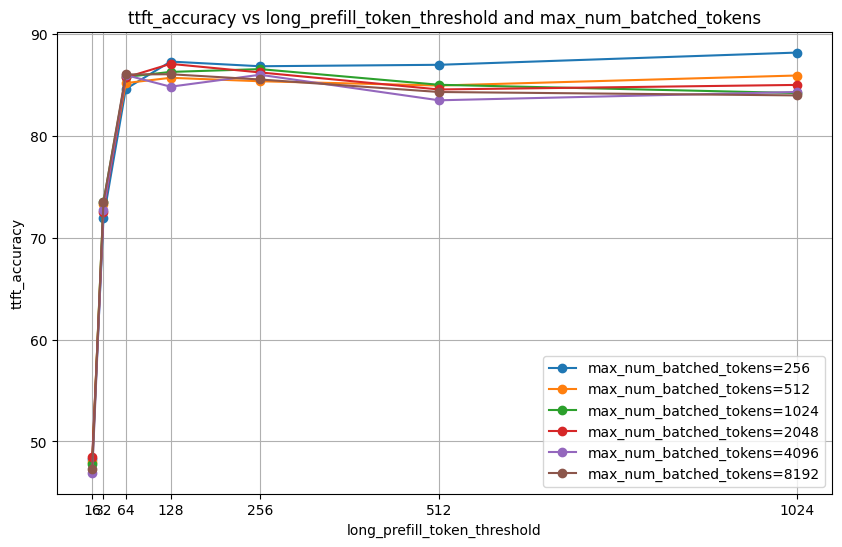

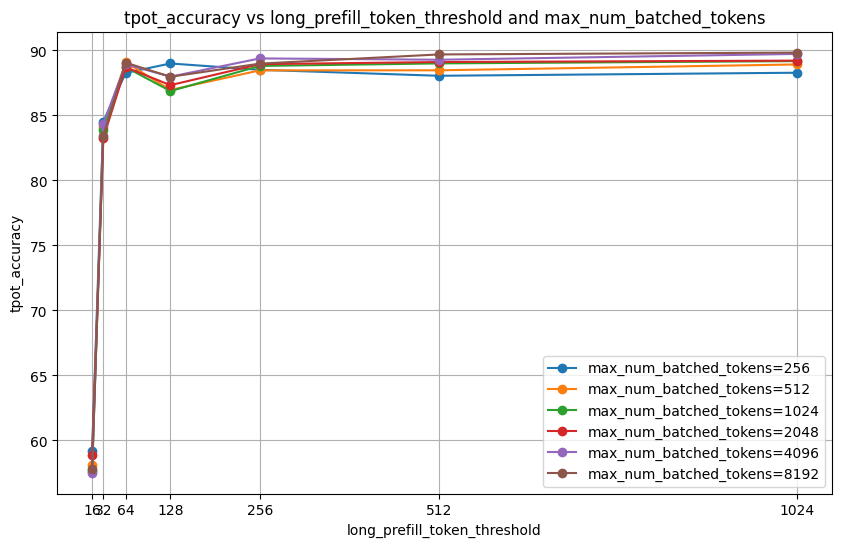

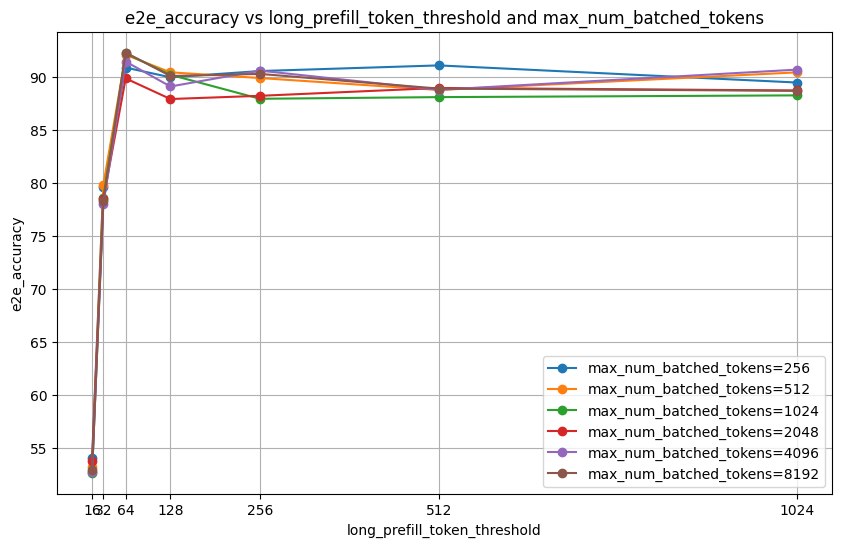

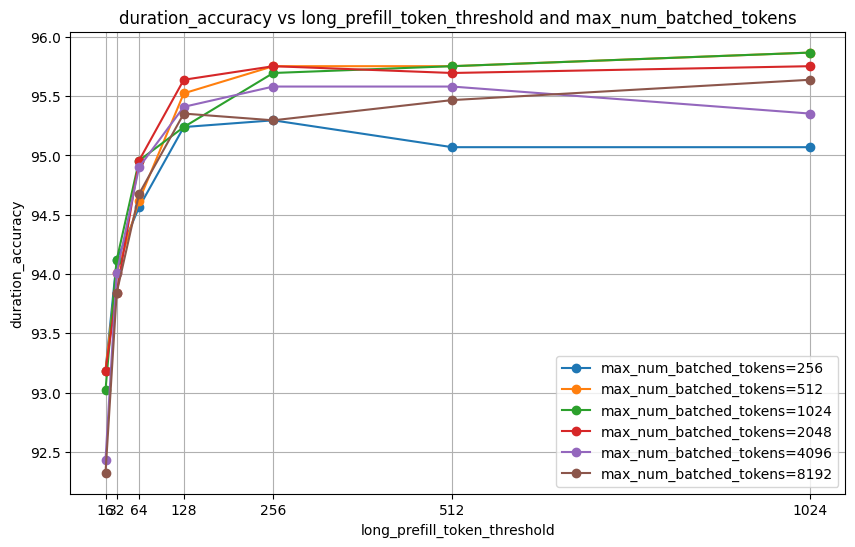

In [2]:

plot_results(plotting_data, x_axis, y_axis, sweep_configs)